In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_excel(r"C:\Users\Celine\Desktop\Research proposal\df_cleaned_final.xlsx")

In [3]:
columns_to_drop = [
    'number of household members (listed)',
    'entries in birth history',
    'knowledge of any method',
    'Number of birth record',
    'current contraceptive method',
    'contraceptive type',
    'body mass index',
    'hemoglobin level (g/dl - 1 decimal)',
    'frequency of reading newspaper or magazine',
    'frequency of watching television',
    'frequency of listening to radio',
    'time since last menstrual period',
    'frequency of using internet last month'
]

df = df.drop(columns=columns_to_drop, errors='ignore')

In [4]:
df.columns

Index(['region', 'religion', 'highest educational level',
       'husband/partner's education level', 'husband/partner's occupation',
       'respondent's occupation', 'wealth index', 'source of drinking water',
       'type of toilet facility',
       'toilet facilities shared with other households',
       'current marital status', 'currently pregnant', 'place of delivery',
       'living children + current pregnancy (grouped)',
       'currently breastfeeding', 'ever had a terminated pregnancy',
       'had diarrhea recently',
       'have mosquito bed net for sleeping (from household questionnaire)',
       'duration of breastfeeding', 'respondent's current age',
       'smokes cigarettes', 'type of place of residence', 'anemia level',
       'during pregnancy, given or bought iron tablets/syrup',
       'delivery by caesarean section',
       'number of times ate solid, semi-solid or soft food yesterday',
       'duration of pregnancy', 'number of times micronutrient was given',
 

In [5]:
from scipy.stats import chi2_contingency, kruskal

# Set visual style
sns.set(style="white")
plt.rcParams['figure.figsize'] = (10, 6)

# Target variable
target = 'anemia level'


# Define variables
categorical_vars = [
    'region',
    'religion',
    'highest educational level',
    "husband/partner's education level",
    "husband/partner's occupation",
    "respondent's occupation",
    'wealth index',
    'source of drinking water',
    'type of toilet facility',
    'toilet facilities shared with other households',
    'current marital status',
    'currently pregnant',
    'place of delivery',
    'living children + current pregnancy (grouped)',
    'currently breastfeeding',
    'ever had a terminated pregnancy',
    'had diarrhea recently',
    'have mosquito bed net for sleeping (from household questionnaire)',
    'smokes cigarettes',
    'type of place of residence',
    'during pregnancy, given or bought iron tablets/syrup',
    'delivery by caesarean section',
    'bmi category',
    'use of contraceptive method',
    'access to media']

numerical_vars = [
    'duration of breastfeeding',
    "respondent's current age",
    'anemia level',
    'number of times ate solid, semi-solid or soft food yesterday',
    'duration of pregnancy',
    'number of times micronutrient was given',
    'Number of birth record'
]




--- Univariate Analysis: Categorical Variables ---


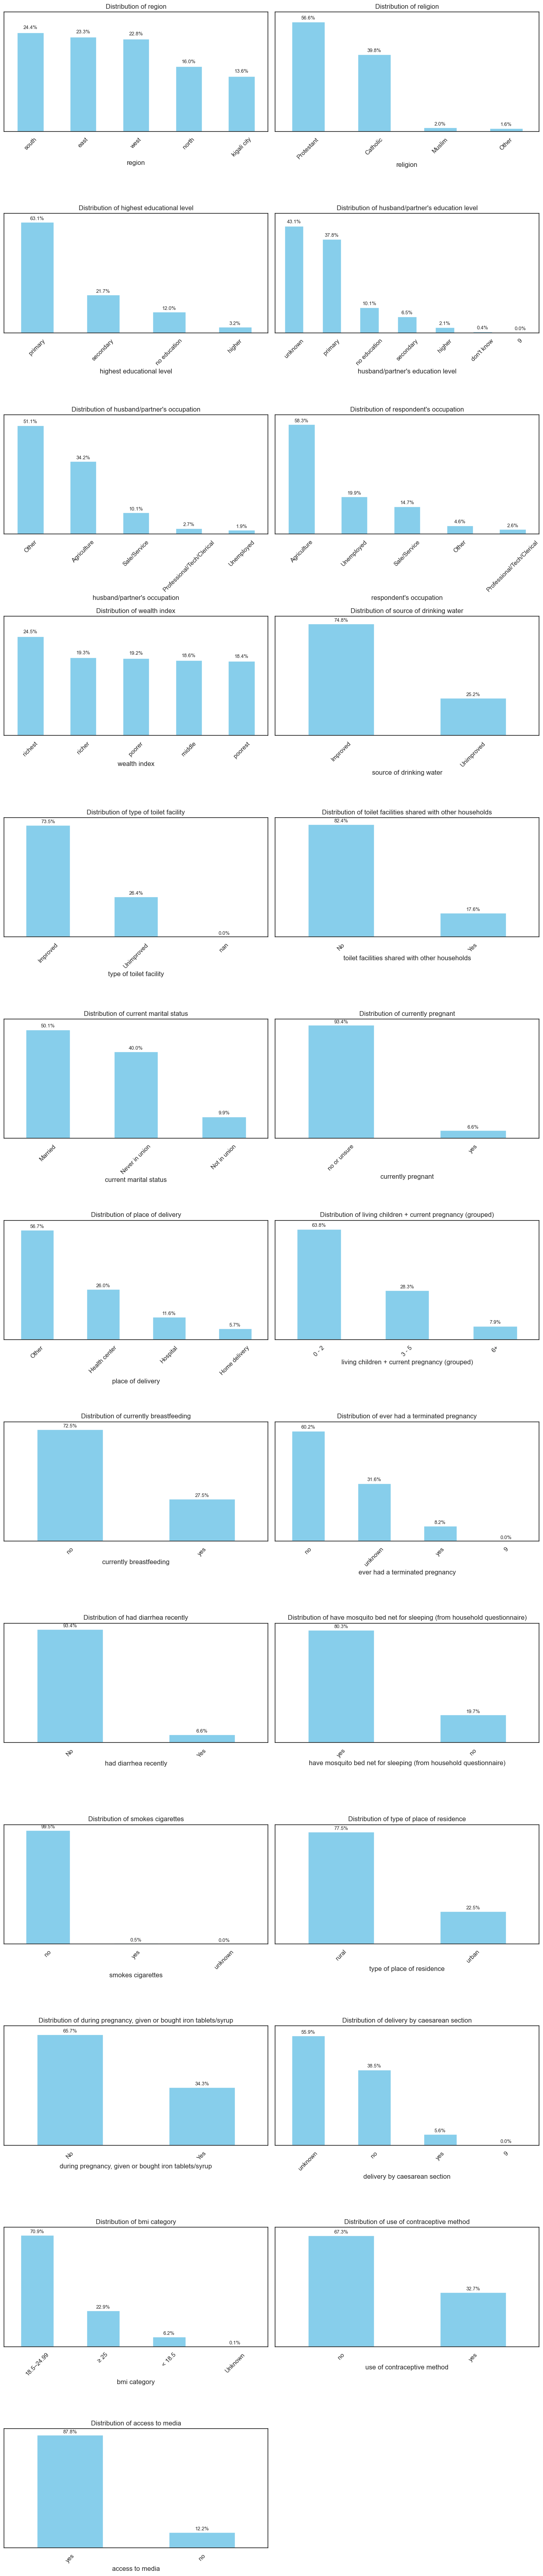

In [6]:
import matplotlib.pyplot as plt

# -----------------------------
# UNIVARIATE ANALYSIS - CATEGORICAL (All in One Figure)
# -----------------------------
print("\n--- Univariate Analysis: Categorical Variables ---")

n_cols = 2  # You can adjust the number of columns in the grid
n_rows = (len(categorical_vars) + n_cols - 1) // n_cols  # Calculate needed rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))
axes = axes.flatten()  # Flatten in case of single row

for i, col in enumerate(categorical_vars):
    if col in df.columns:
        counts = df[col].value_counts(normalize=True, dropna=False) * 100
        sorted_counts = counts.sort_values(ascending=False)

        ax = axes[i]
        sorted_counts.plot(kind='bar', color='skyblue', ax=ax)
        ax.set_title(f"Distribution of {col}")
        #ax.set_xlabel(col)
        #ax.set_ylabel("Percentage")
        ax.set_ylim(0, sorted_counts.max() + 5)

        for j, value in enumerate(sorted_counts):
            ax.text(j, value + 0.5, f"{value:.1f}%", ha='center', va='bottom', fontsize=9)

        ax.set_yticklabels([])
        ax.tick_params(axis='y', which='both', left=False)
        ax.tick_params(axis='x', labelrotation=45)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



--- Bivariate Analysis: Numerical vs Binary Categorical Target ---


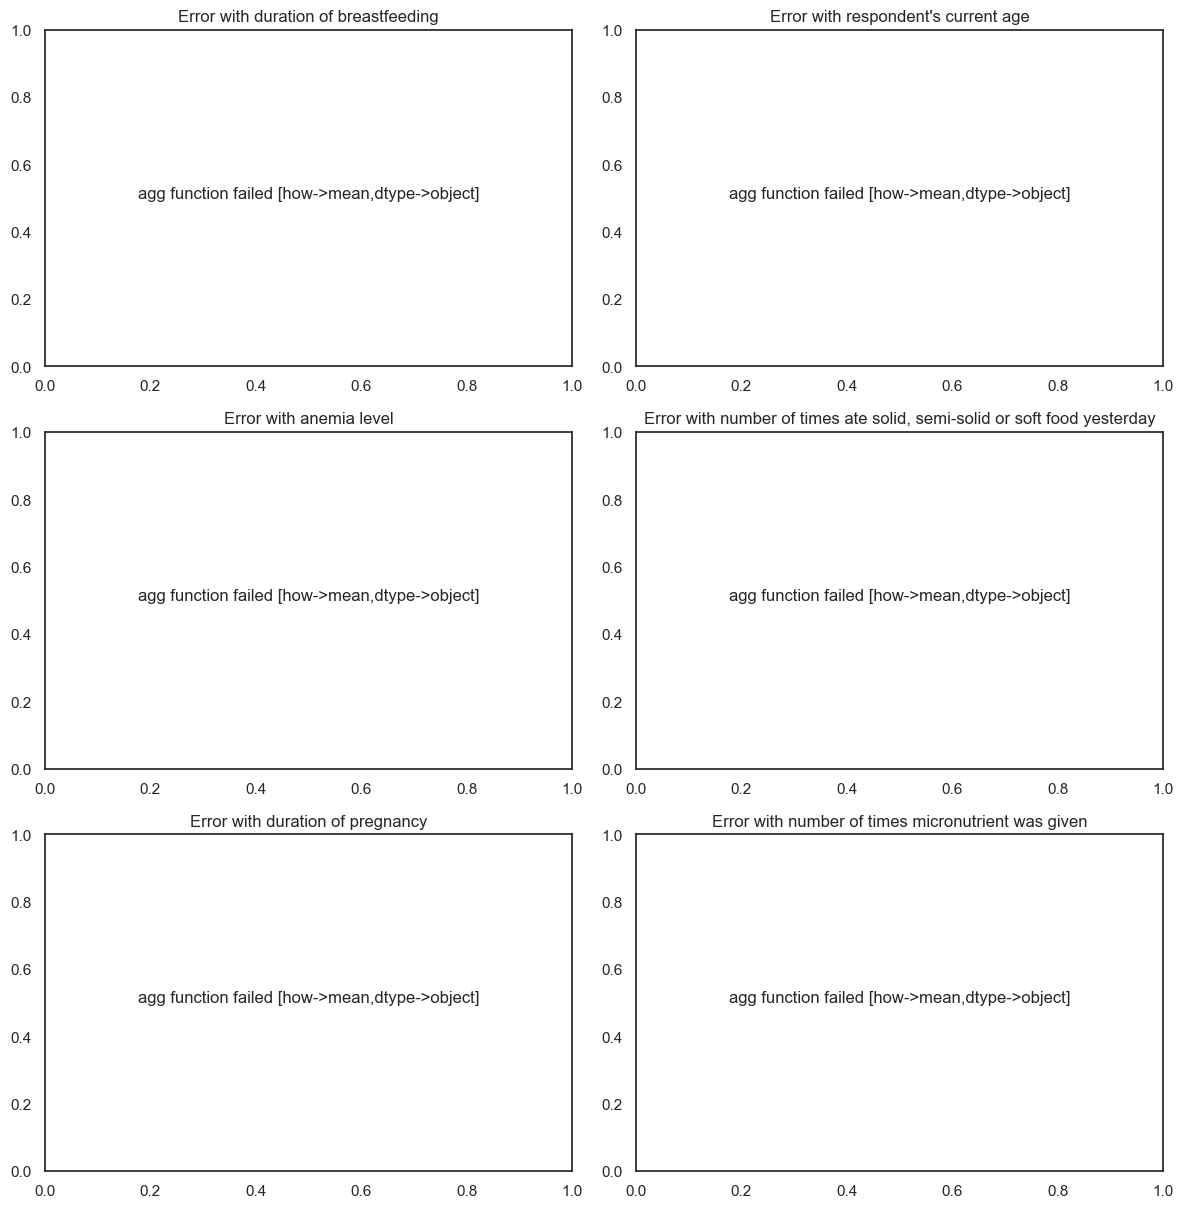

In [7]:
import matplotlib.pyplot as plt

print("\n--- Bivariate Analysis: Numerical vs Binary Categorical Target ---")

# Check that target has exactly 2 groups
unique_targets = df[target].dropna().unique()
if len(unique_targets) != 2:
    print(f"Target variable '{target}' must have exactly 2 groups.")
else:
    n_cols = 2
    n_rows = (len(numerical_vars) + 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(numerical_vars):
        if col in df.columns:
            ax = axes[i]
            try:
                # Mean values by target
                means = df.groupby(target)[col].mean().sort_index()
                means.plot(kind='bar', ax=ax, color='skyblue')

                ax.set_title(f'Mean {col} by {target}')
                ax.set_ylabel(f'Mean {col}')
                ax.set_xlabel(target)

                for j, val in enumerate(means):
                    ax.text(j, val + 0.01 * max(means), f"{val:.2f}", ha='center', va='bottom', fontsize=9)

                ax.set_ylim(0, max(means) * 1.2)
                ax.tick_params(axis='x', rotation=0)
            except Exception as e:
                ax.set_title(f"Error with {col}")
                ax.text(0.5, 0.5, str(e), ha='center')
        else:
            axes[i].set_visible(False)

    # Hide extra axes if any
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()


In [8]:

categorical_vars = [
    
    'region',
    'religion',
    'highest educational level',
    "husband/partner's education level",
    "husband/partner's occupation",
    "respondent's occupation",
    'wealth index',
    'source of drinking water',
    'type of toilet facility',
    'toilet facilities shared with other households',
    'current marital status',
    'currently pregnant',
    'place of delivery',
    'living children + current pregnancy (grouped)',
    'currently breastfeeding',
    'ever had a terminated pregnancy',
    'had diarrhea recently',
    'have mosquito bed net for sleeping (from household questionnaire)',
    'smokes cigarettes',
    'type of place of residence',
    'during pregnancy, given or bought iron tablets/syrup',
    'delivery by caesarean section',
    'bmi category',
    'use of contraceptive method',
    'access to media',

    'duration of breastfeeding',
    "respondent's current age",
    'number of times ate solid, semi-solid or soft food yesterday',
    'duration of pregnancy',
    'number of times micronutrient was given',
    
]
    


summary_tables = []

for var in categorical_vars:
    # Generate frequency table
    freq_table = df[var].value_counts(dropna=False).reset_index()
    freq_table.columns = ['Category', 'Frequency']
    freq_table['Variable'] = var
    freq_table['Percentage'] = (freq_table['Frequency'] / len(df)) * 100
    summary_tables.append(freq_table)

# Combine all summary tables
summary_df = pd.concat(summary_tables, ignore_index=True)

# Reorder columns
summary_df = summary_df[['Variable', 'Category', 'Frequency', 'Percentage']]
summary_df['Percentage'] = summary_df['Percentage'].round(1)

# Save as a new table
characteristics_of_women = summary_df.copy()

# Save to Excel
characteristics_of_women.to_excel("characteristics_of_women.xlsx", index=False)



In [9]:
df['anemia level'].value_counts()

anemia level
Not Anemic    17443
Anemic         3382
Name: count, dtype: int64

In [10]:
import pandas as pd
from scipy.stats import chi2_contingency

# List of categorical variables
categorical_vars = [
    'region',
    'religion',
    'highest educational level',
    "husband/partner's education level",
    "husband/partner's occupation",
    "respondent's occupation",
    'wealth index',
    'source of drinking water',
    'type of toilet facility',
    'toilet facilities shared with other households',
    'current marital status',
    'currently pregnant',
    'place of delivery',
    'living children + current pregnancy (grouped)',
    'currently breastfeeding',
    'ever had a terminated pregnancy',
    'had diarrhea recently',
    'have mosquito bed net for sleeping (from household questionnaire)',
    'smokes cigarettes',
    'type of place of residence',
    'during pregnancy, given or bought iron tablets/syrup',
    'delivery by caesarean section',
    'bmi category',
    'use of contraceptive method',
    'access to media',

    'duration of breastfeeding',
    "respondent's current age",
    'number of times ate solid, semi-solid or soft food yesterday',
    'duration of pregnancy',
    'number of times micronutrient was given'
    
]


results = []

for var in categorical_vars:
    try:
        # Drop missing values for var and anemia level
        temp_df = df[[var, 'anemia level']].dropna()

        # Create crosstab
        table = pd.crosstab(temp_df[var], temp_df['anemia level'])

        # Skip if not enough categories for chi-square
        if table.shape[0] < 2 or table.shape[1] < 2:
            print(f"Skipping {var}: insufficient categories for chi-square")
            continue

        # Calculate row percentages
        percent_table = table.div(table.sum(axis=1), axis=0) * 100

        # Chi-square test
        chi2, p, dof, ex = chi2_contingency(table)

        for category in table.index:
            results.append({
                'Variable': var,
                'Category': category,
                'Not Anemic (%)': round(percent_table.loc[category, 'Not Anemic'], 1) if 'Not Anemic' in percent_table.columns else 0,
                'Anemic (%)': round(percent_table.loc[category, 'Anemic'], 1) if 'Anemic' in percent_table.columns else 0,
                'N': table.loc[category].sum(),
                'Chi-square': round(chi2, 2),
                'P-value': f"{p:.4f}" if p >= 0.0001 else "<0.0001"
            })
    except Exception as e:
        print(f"Error with variable '{var}': {e}")

bivariate_anemia_table = pd.DataFrame(results)

# Save to Excel
bivariate_anemia_table.to_excel("bivariate_anemia_chi_square.xlsx", index=False)

bivariate_anemia_table


,Variable,Category,Not Anemic (%),Anemic (%),N,Chi-square,P-value
0,region,east,81.6,18.4,4848,64.30,<0.0001
1,region,kigali city,84.3,15.7,2831,64.30,<0.0001
2,region,north,87.4,12.6,3328,64.30,<0.0001
3,region,south,82.0,18.0,5072,64.30,<0.0001
4,region,west,84.9,15.1,4746,64.30,<0.0001
...,...,...,...,...,...,...,...
97,duration of pregnancy,9 months,83.8,16.2,20739,1.44,0.4876
98,duration of pregnancy,>9 months,91.7,8.3,12,1.44,0.4876
99,number of times micronutrient was given,High,85.7,14.3,175,6.23,0.0443
100,number of times micronutrient was given,Low,94.3,5.7,70,6.23,0.0443


MULTIVARRIATE ANALYSIS

In [11]:
df["anemia level"].value_counts()

anemia level
Not Anemic    17443
Anemic         3382
Name: count, dtype: int64

In [12]:
# Encode 'anemia_level' into binary: 0 = Not Anemic, 1 = Anemic
df['anemic_binary'] = df['anemia level'].apply(lambda x: 0 if x == 'Not Anemic' else 1)


In [13]:
print(df['anemic_binary'].value_counts())


anemic_binary
0    17443
1     3382
Name: count, dtype: int64


In [15]:
predictors = [
    'region',
    'religion',
    'highest educational level',
    "husband/partner's education level",
    "husband/partner's occupation",
    "respondent's occupation",
    'wealth index',
    'source of drinking water',
    'type of toilet facility',
    'toilet facilities shared with other households',
    'current marital status',
    'currently pregnant',
    'place of delivery',
    'living children + current pregnancy (grouped)',
    'currently breastfeeding',
    'ever had a terminated pregnancy',
    'had diarrhea recently',
    'have mosquito bed net for sleeping (from household questionnaire)',
    'smokes cigarettes',
    'type of place of residence',
    'during pregnancy, given or bought iron tablets/syrup',
    'delivery by caesarean section',
    'bmi category',
    'use of contraceptive method',
    'access to media',


    'duration of breastfeeding',
    "respondent's current age",
    'anemia level',
    'number of times ate solid, semi-solid or soft food yesterday',
    'duration of pregnancy',
    'number of times micronutrient was given'
]

# Check missing values
print(df[predictors + ['anemic_binary']].isnull().sum())


region                                                               0
religion                                                             0
highest educational level                                            0
husband/partner's education level                                    0
husband/partner's occupation                                         0
respondent's occupation                                              0
wealth index                                                         0
source of drinking water                                             0
type of toilet facility                                              9
toilet facilities shared with other households                       0
current marital status                                               0
currently pregnant                                                   0
place of delivery                                                    0
living children + current pregnancy (grouped)                        0
curren

In [16]:
df_model = df[predictors + ['anemic_binary']].dropna()


for col in predictors:
    if df_model[col].dtype == 'object':
        df_model[col] = df_model[col].astype(str)


In [17]:
print(df_model.dtypes)


region                                                               object
religion                                                             object
highest educational level                                            object
husband/partner's education level                                    object
husband/partner's occupation                                         object
respondent's occupation                                              object
wealth index                                                         object
source of drinking water                                             object
type of toilet facility                                              object
toilet facilities shared with other households                       object
current marital status                                               object
currently pregnant                                                   object
place of delivery                                                    object
living child

In [23]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Your target variable
target = 'anemic_binary'

# Define predictor variables
predictors = [
    'region',
    'religion',
    'highest educational level',
    "husband/partner's education level",
    "husband/partner's occupation",
    "respondent's occupation",
    'wealth index',
    'source of drinking water',
    'type of toilet facility',
    'toilet facilities shared with other households',
    'current marital status',
    'currently pregnant',
    'place of delivery',
    'living children + current pregnancy (grouped)',
    'currently breastfeeding',
    'ever had a terminated pregnancy',
    'had diarrhea recently',
    'have mosquito bed net for sleeping (from household questionnaire)',
    'smokes cigarettes',
    'type of place of residence',
    'during pregnancy, given or bought iron tablets/syrup',
    'delivery by caesarean section',
    'bmi category',
    'use of contraceptive method',
    'access to media',

    'duration of breastfeeding',
    "respondent's current age",

    'duration of pregnancy',
    'number of times micronutrient was given',
   
  
]

# Drop duplicates in the list if any
predictors = list(set(predictors))

# Subset DataFrame and drop rows with missing values in predictors + target
df_model = df[predictors + [target]].dropna()

# Convert object columns to string to ensure consistency
for col in predictors:
    if df_model[col].dtype == 'object' or df_model[col].dtype.name == 'category':
        df_model[col] = df_model[col].astype(str)

# Separate categorical and numeric variables
categorical_cols = [col for col in predictors if df_model[col].dtype == 'object']
numeric_cols = [col for col in predictors if col not in categorical_cols]

# One-hot encode categorical variables
df_dummies = pd.get_dummies(df_model[categorical_cols], drop_first=True)

# Combine numeric features and dummies
X = pd.concat([df_model[numeric_cols], df_dummies], axis=1)

# Add constant (intercept)
X = sm.add_constant(X)

# Convert all X data to numeric, coerce any conversion errors to NaN, then fill
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

# Remove constant columns (with only one unique value)
constant_cols = [col for col in X.columns if X[col].nunique() == 1]
X = X.drop(columns=constant_cols, errors='ignore')

# Prepare target variable
y = df_model[target].astype(int)

# Check for binary classes in the target
if len(y.unique()) < 2:
    raise ValueError(f"Target variable '{target}' must have both classes (0 and 1)")

# Fit logistic regression model
model = sm.Logit(y, X).fit(disp=False)

# Summarize results
summary = model.summary2().tables[1]

# Calculate Adjusted Odds Ratios and 95% Confidence Intervals
summary['aOR'] = np.exp(summary['Coef.'])
summary['95% CI Lower'] = np.exp(summary['Coef.'] - 1.96 * summary['Std.Err.'])
summary['95% CI Upper'] = np.exp(summary['Coef.'] + 1.96 * summary['Std.Err.'])

# Prepare formatted result table
table3 = summary[['aOR', '95% CI Lower', '95% CI Upper', 'P>|z|']].copy()
table3['aOR (95% CI)'] = table3.apply(
    lambda row: f"{row['aOR']:.2f} ({row['95% CI Lower']:.2f} - {row['95% CI Upper']:.2f})", axis=1
)

# Reorder and rename columns
table3 = table3[['aOR (95% CI)', 'P>|z|']]
table3.reset_index(inplace=True)
table3.rename(columns={'index': 'Variable', 'P>|z|': 'p-value'}, inplace=True)

# Print result
print(table3)

# Save to Excel
table3.to_excel("Table_4_3_Multivariate_Anemia_Risk_Factors.xlsx", index=False)


                                             Variable        aOR (95% CI)  \
0   have mosquito bed net for sleeping (from house...  0.99 (0.89 - 1.09)   
1                                 bmi category_< 18.5  1.26 (1.09 - 1.46)   
2                                bmi category_Unknown  0.70 (0.15 - 3.16)   
3                                   bmi category_≥ 25  0.84 (0.76 - 0.93)   
4                                     religion_Muslim  0.99 (0.75 - 1.31)   
..                                                ...                 ...   
65  during pregnancy, given or bought iron tablets...  1.07 (0.93 - 1.23)   
66                                access to media_yes  1.01 (0.90 - 1.14)   
67                          smokes cigarettes_unknown   0.00 (0.00 - inf)   
68                              smokes cigarettes_yes  0.89 (0.53 - 1.49)   
69                source of drinking water_Unimproved  1.02 (0.94 - 1.11)   

     p-value  
0   0.782607  
1   0.001461  
2   0.642209  
3   0.000549  


c:\Users\Celine\Documents\Hirwa documents\researchproject code\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Celine\Documents\Hirwa documents\researchproject code\.venv\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
non_numeric_cols = X.columns[X.dtypes == 'object'].tolist()
print("Non-numeric columns:", non_numeric_cols)


Non-numeric columns: []


In [ ]:
# Check y type and unique values
print(y.dtype)
print(y.unique())

# Ensure it's numeric and only 0/1
y = pd.to_numeric(y, errors='coerce')
y = y.dropna()  # just in case
y = y.astype(int)

print(y.dtype)
print(y.unique())


int64
[1 0]
int64
[1 0]


4.2.2 Anemia Levels Among Women in Rwanda


In [ ]:
df['anemia level'].value_counts()

anemia level
Not Anemic    17443
Anemic         3382
Name: count, dtype: int64

C:\Users\CHirwa\AppData\Local\Temp\ipykernel_26452\439909121.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=anemia_percent.index, y=anemia_percent.values, palette='pastel')


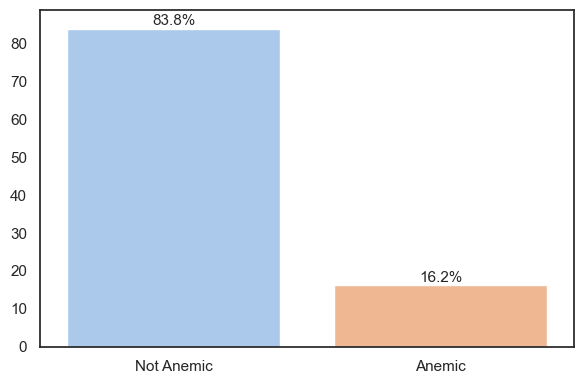

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Anemia counts
anemia_counts = pd.Series({
    'Not Anemic': 17476,
    'Anemic': 3382
})

# Calculate percentages
total = anemia_counts.sum()
anemia_percent = (anemia_counts / total) * 100

# Plot percentages instead of raw counts
plt.figure(figsize=(6, 4))
sns.barplot(x=anemia_percent.index, y=anemia_percent.values, palette='pastel')

# Remove labels as requested
#plt.title("Anemia Status Distribution Among Women")
plt.xlabel("")
plt.ylabel("")
plt.grid(False)
# Show percentages above the bars
for i, val in enumerate(anemia_percent.values):
    plt.text(i, val + 1, f'{val:.1f}%', ha='center', fontsize=11)

plt.ylim(0, anemia_percent.max() + 5)  # Leave space for text
plt.tight_layout()
plt.show()


In [ ]:
# 2. Anemia by Age Group
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='age_group', hue='anemia level', palette='Set2')
plt.title('Anemia Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Women')
plt.legend(title='Anemia Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Anemia by Region
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='region', hue='anemia level', palette='Set2')
plt.title('Anemia Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Women')
plt.legend(title='Anemia Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Anemia by Pregnancy Status
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='currently pregnant', hue='anemia level', palette='Set2')
plt.title('Anemia by Pregnancy Status')
plt.xlabel('Currently Pregnant')
plt.ylabel('Number of Women')
plt.legend(title='Anemia Status')
plt.tight_layout()
plt.show()


ValueError: Could not interpret value `age_group` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x500 with 0 Axes>

In [ ]:
import pandas as pd

# Assuming your DataFrame is 'df' with columns 'age_group' and 'anemia level'

# 1. Calculate counts by age_group and anemia level
count_df = df.groupby(['age_group', 'anemia level']).size().unstack(fill_value=0)

# 2. Calculate row-wise percentages
percent_df = count_df.div(count_df.sum(axis=1), axis=0) * 100

# Optional: round percentages for cleaner display
percent_df_rounded = percent_df.round(2)

# Display the percentage table
print(percent_df_rounded)

# If you want to save to Excel:
# percent_df_rounded.to_excel("anemia_percentages_by_age_group.xlsx")


anemia level  Anemic  Not Anemic
age_group                       
15–19          15.62       84.38
20–24          15.96       84.04
25–29          15.37       84.63
30–34          14.85       85.15
35–44          17.09       82.91
45–49          20.34       79.66
